In [30]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plfit
from math import log
from scipy.special import comb

### Problem 3

Suppose that

$$
p = p(n) = \frac{\ln n + \ln\ln n + c}{2n}
$$

for some constant $c \in \mathbb{R}$. The expected number of isolated edges in $\mathcal{G} (n,p)$ (an edge $uv$ is isolated if $u$ is the only neighbour of $v$ and vice versa) is asymptotically equal to $\frac{e^{-c}}{4}$. 

Compare the above theoretical prediciton for the expected number of isolated edges with empirical results based on $1\,000$ independent runs for small graphs on $n=100$ nodes and larger graphs on $n=10\,0000$ nodes. Make a figure similar to Figure 2.2 with, for example $c\in [-3, 3]$.

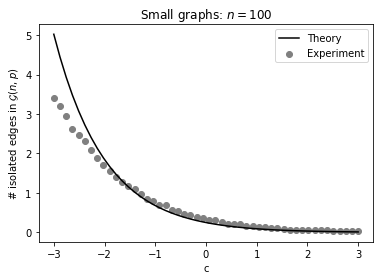

In [16]:
repeats = 1000
n = 100
c = np.linspace(-3, 3)
p = (log(n) + log(log(n)) + c)/(2*n)

isolated_edges_ave = np.zeros(len(p))

for c_i in range(len(p)):
    
    edges = np.zeros(repeats)
    
    for rep_i in range(repeats):
        
        g = ig.Graph.Erdos_Renyi(n=n, p=p[c_i])
        isolated = g.subgraph([v for v in g.vs() if len(g.neighbors(v))==1])
        edges[rep_i] = isolated.ecount()
        
    isolated_edges_ave[c_i] = np.mean(edges)
    
plt.scatter(c, isolated_edges_ave, c='grey', label='Experiment')
plt.plot(c, np.exp(-c)/4, c='k', label='Theory')
plt.xlabel("c")
plt.ylabel(r"# isolated edges in $\mathcal{G}(n,p)$")
plt.title("Small graphs: $n=100$")
plt.legend(loc='best')
plt.show()

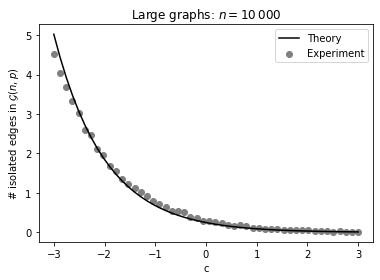

In [17]:
repeats = 1000
n = 10000
c = np.linspace(-3, 3)
p = (log(n) + log(log(n)) + c)/(2*n)

isolated_edges_ave = np.zeros(len(p))

for c_i in range(len(p)):
    
    edges = np.zeros(repeats)
    
    for rep_i in range(repeats):
        
        g = ig.Graph.Erdos_Renyi(n=n, p=p[c_i])
        isolated = g.subgraph([v for v in g.vs() if len(g.neighbors(v))==1])
        edges[rep_i] = isolated.ecount()
        
    isolated_edges_ave[c_i] = np.mean(edges)
    
plt.scatter(c, isolated_edges_ave, c='grey', label='Experiment')
plt.plot(c, np.exp(-c)/4, c='k', label='Theory')
plt.xlabel("c")
plt.ylabel(r"# isolated edges in $\mathcal{G}(n,p)$")
plt.title(r"Large graphs: $n=10\,000$")
plt.legend(loc='best')
plt.show()

### Problem 4
We showed that the expected number of cycles in $\mathcal{P}_{n,2}$ is asymptotic to $(1/2)\ln n$. Compare this theoretical prediction with empirical results based on $1\,000$ independent runs for small graphs on $n=100$ nodes and larger graphs on $n=10\,000$ nodes. 

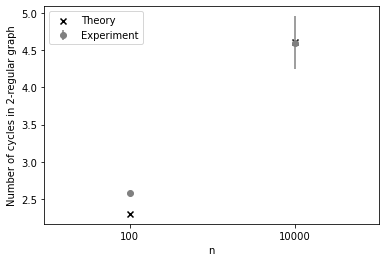

In [39]:
def find_cycles(G, v, cycle_set):
    "Find the cycles in graph G starting from vertex v"
    neighbourlist = G.neighbors(v)
    for u in neighbourlist:
        paths = G.get_all_simple_paths(G.vs[u], to=v)
        ## ignoring multigraphs
        cycles = [tuple(sorted(i)) for i in paths if len(i)>=3]
        for c in cycles:
            if c not in cycle_set:
                cycle_set.add(c)
    return cycle_set

n = [100, 10000]
reps = [1000, 10]
ave_cycles = np.zeros([len(n), 2])

for n_i in range(len(n)):
    cycles = np.zeros(reps[n_i])
    for rep_i in range(reps[n_i]):
        g = ig.Graph.Degree_Sequence([2]*n[n_i])

        cycle_set = set()
        for v in g.vs():
            cycle_set = find_cycles(g, v, cycle_set)
            
        cycles[rep_i] = len(cycle_set)
        
    ave_cycles[n_i] = [np.mean(cycles), np.std(ave_cycles)/reps[n_i]**0.5]

plt.errorbar(n, ave_cycles[:,0], yerr=ave_cycles[:,1], fmt='o', c='grey', label='Experiment')
plt.scatter(n, 0.5*np.log(n), marker='x', c='k', label='Theory')
plt.xticks([100, 10000])
plt.xlim([-5000, 15000])
plt.xlabel("n")
plt.ylabel('Number of cycles in 2-regular graph')
plt.legend(loc='upper left')

### Problem 6 
Generate two independent copies of $\mathcal{G}(n,p)$ model with $n=10\,000$ and $p=1/4$, graphs $G_1$ and $G_2$. Then take a union of these two graphs $G_1 \cup G_2$. Check the density of $G_1 \cup G_2$, that is, the ratio between the number of edges in $G_1 \cup G_2$ and ${n \choose 2}$. Is it close to $p+p=1/2$? If not, can you explain why?

In [50]:
n = 10000
g1 = ig.Graph.Erdos_Renyi(n=n, p=0.25)
g2 = ig.Graph.Erdos_Renyi(n=n, p=0.25)

edgelist1 = set(g1.get_edgelist())
edgelist2 = set(g2.get_edgelist())

union_edgelist = edgelist1.union(edgelist2)

print("Density of graph union: ", len(union_edgelist)/comb(n,2))

Density of graph union:  0.4374072207220722


The density of $G_1 \cup G_2$ is smaller than $p+p=1/2$. As edges which appear in both $G_1$ and $G_2$ are not double-counted in the union, the density of $G_1 \cup G_2$ should be $2p - p^2 = 0.4375$, which is much closer to the experimental result. 

### Problem 7
Perform an experiment with the Watts-Strogatz model  using $dim = 2$, $size=100$, $nei=8$. Plot the global clustering coefficient and the average local clustering coefficient as a function of $p \in (0, 1)$. 

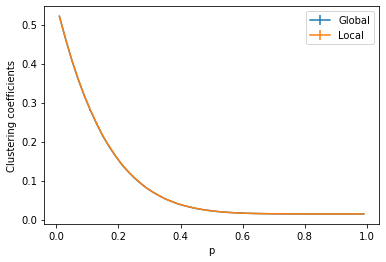

In [6]:
p = np.linspace(0.01, 0.99)
repeats = 2

ave_glob_clust_coeffs = np.zeros([len(p),2])
ave_loc_clust_coeffs = np.zeros([len(p),2])

for p_i in range(len(p)):
    glob_clust = np.zeros(repeats)
    loc_clust = np.zeros(repeats)
    for rep_i in range(repeats):
        g = ig.Graph.Watts_Strogatz(dim=2, size=100, nei=8, p=p[p_i])
        glob_clust[rep_i] = g.transitivity_undirected(mode='nan')
        loc_clust[rep_i] = g.transitivity_avglocal_undirected(mode='nan')
        
    ave_glob_clust_coeffs[p_i] = [np.mean(glob_clust), np.std(glob_clust)/repeats**0.5]
    ave_loc_clust_coeffs[p_i] = [np.mean(loc_clust), np.std(loc_clust)/repeats**0.5]
    
plt.errorbar(p, ave_glob_clust_coeffs[:,0], yerr=ave_glob_clust_coeffs[:,1], label='Global')
plt.errorbar(p, ave_loc_clust_coeffs[:,0], yerr=ave_loc_clust_coeffs[:,1], label='Local')
plt.xlabel("p")
plt.ylabel("Clustering coefficients")
plt.legend(loc='best')
plt.show()

### Problem 8
Perform an experiment using the Preferential Attachment model, with $n=10\,000$ and $m=5$. Plot the inverse cumulative in-degree distribution. Use the Kolmogorov-Smirnov test to estimate the degree exponent.

/home/tiantian/anaconda3/lib/python3.7/site-packages/plfit/plfit.py:1012: RuntimeWarning: divide by zero encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
/home/tiantian/anaconda3/lib/python3.7/site-packages/plfit/plfit.py:1012: RuntimeWarning: invalid value encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
/home/tiantian/anaconda3/lib/python3.7/site-packages/plfit/plfit.py:1065: RuntimeWarning: divide by zero encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)
/home/tiantian/anaconda3/lib/python3.7/site-packages/plfit/plfit.py:1065: RuntimeWarning: invalid value encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)


Degree exponent estimated by KS test:  2.0320164423766682


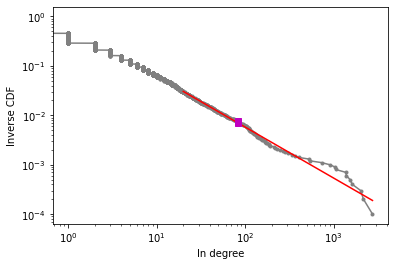

In [43]:
n = 10000
g = ig.Graph.Barabasi(n=n, m=5, directed=True)
in_degrees = g.degree(mode='in')

## run plfit and compute K-S statistic
X = plfit.plfit(in_degrees)

X.plotcdf(pointcolor='grey', pointmarker='.',zoom=False)
plt.xlabel("In degree")
plt.ylabel("Inverse CDF")

print("Degree exponent estimated by KS test: ", X.plfit()[1])